In [1]:
'''
And here are the imports for the different scikit-learn libraries that we'll use to implement different ML models. 
We'll start off with the logistic regression classifier and move onto other models along the way. We'll 
work with the same Titanic dataset to build and train all of these models.
'''
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from IPython.display import Image

In [2]:
'''
You can see that categorical values have been either label encoded or one-hot encoded. 
The target label, what we're trying to predict using our model, are values in the survived column.
'''
titanic_df=pd.read_csv("Data/titanic_processed.csv")
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,2,1,31.0,1,1,26.250,0,0,1
1,1,1,0,23.0,1,0,113.275,1,0,0
2,0,3,1,19.0,0,0,6.750,0,1,0
3,1,3,1,3.0,1,1,15.900,0,0,1
4,0,1,1,64.0,1,4,263.000,0,0,1


In [3]:
'''
 So let's extract the features from this dataframe. 
 All columns starting from column 1 onwards are our features. 
 Here are all of the features we'll use to train the different classification models. 
'''
FEATURES=list(titanic_df.columns[1:])
FEATURES

['Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S']

In [4]:
'''
For each of the models that we build and train in this notebook, we'll evaluate the accuracy, precision, 
and recall of the models on test data and store the results in a dictionary format. This is the result_dict.

The keys of this result dictionary will be the different models that we build and the values will 
contain the evaluation metrics for each of the models.
'''
result_dict={}

In [5]:
'''
This is the summarize_classification helper function, which takes in the actual, as well as predicted Y values 
from our model and quickly summarizes the different scores. 

Within this helper function, we calculate the accuracy of our model in terms of a fraction and we 
also get the number of accurately predicted labels from our model. 

When you pass in normalize=True to the accuracy_score function, you get accuracy in terms of a fraction, 
and when normalize=False, you get the number of accurately predicted labels. 

This helper function also calculates the precision and recall of a model, and we return all of these 
scores in a dictionary format. 
'''
def summarize_classification(y_test,y_pred):
    acc=accuracy_score(y_test,y_pred,normalize=True)
    num_acc=accuracy_score(y_test,y_pred,normalize=False)
    prec=precision_score(y_test,y_pred)
    recall=recall_score(y_test,y_pred)
    
    return {'accuracy': acc, 
            'precision': prec,
            'recall':recall, 
            'accuracy_count':num_acc}

In [6]:
'''
Build_model takes in a number of input arguments 

The classifier function is a function that we'll define. This function takes in the training data and the 
training labels, instantiates an estimator object, and trains the model. 

The name of y_col is a string which gives us the column in our dataframe that contains our target labels to 
use for training. 

The names of x_cols gives us the column names of the features that we use for training.
This is specified in the form of a list.

The dataset input parameter contains the dataframe that holds our training data and the test fracs 
tells us what fraction of the data we should hold out for testing our model.




'''

def build_model(classifier_fn,                
                name_of_y_col, 
                names_of_x_cols, 
                dataset, 
                test_frac=0.2):
    #Extract the X variables that is a features we'll use for training and the Y values from our dataset. 
    X=dataset[names_of_x_cols]
    Y=dataset[name_of_y_col]
    
    '''
    We then use the train_test_split function from scikit-learn in order to split our
    dataset into training data and test data. 
    '''
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=test_frac)
    
    '''
    Because this is a helper function used to build and train different classifier models, 
    we call the classifier function to instantiate the right estimator object and train the model. 
    
     
    '''
    model=classifier_fn(x_train,y_train)
    
    '''
    The classifier function will then return an instance of the fully trained model, which we'll then use 
    to predict on the test data.
    
    We'll also use the model to predict on training instances as well. 
    This will allow us to compare how the model performs on new data it hasn't seen before and 
    how it performs on training instances which it has encountered before in the training phase of the model.
    
    We summarize our classification model by calling the summarize_classification helper 
    function that we just defined earlier. 
    '''
    y_pred=model.predict(x_test)
    y_pred_train=model.predict(x_train)
    
    train_summary=summarize_classification(y_train,y_pred_train)
    test_summary=summarize_classification(y_test,y_pred)
    
    '''
    Within the build model function, we'll also instantiate a dataframe containing actual versus 
    predicted values on the test data and calculate the confusion matrix. 
    '''
    pred_results=pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
    
    model_crosstab=pd.crosstab(pred_results.y_pred,pred_results.y_test)
    
    '''
    And finally, we'll return all of this bits of information in the form of a dictionary. 
    We have the training summary, the test summary, and the confusion matrix on the test data. 
    '''
    
    return {'training': train_summary, 
            'test': test_summary,
            'confusion_matrix': model_crosstab}

In [7]:
'''
helper function here, which will allow us to quickly compare the results of the different classification 
models that we build.
'''
def compare_results():
    '''
    we'll use a for loop to iterate through the result dictionary which contains the results of the 
    different classification models. 
    
    '''
    for key in result_dict:
        print('Classification: ', key)

        print()
        '''
        For each of these models, we'll print out information on how the model performed on training data.
        This will be with the header training data. 
        
        We'll access the training scores for a particular model using the training summary that was 
        returned from the build_model function that we saw earlier. 
        '''
        print('Training data')
        for score in result_dict[key]['training']:
            print(score, result_dict[key]['training'][score])

        print()
        print('Test data')
        for score in result_dict[key]['test']:
            print(score, result_dict[key]['test'][score])
       
        print()

In [8]:
'''
we'll now see how we can use these helper functions to build and train a logistic regression model. 

We first define a function that takes in training data and training labels. 

This instantiates a logistic regression estimator and calls fit on the estimator to start training, 
and we return the fully trained model. 

'''

def logistic_fn(x_train,y_train):
    model=LogisticRegression(solver='liblinear')
    model.fit(x_train,y_train)
    
    return model

In [9]:
'''
With the help of functions that we've defined, you'll find that it's very easy to build and train a model.
We simply called the build_model function and pass in the logistic function. 

The logistic function is what will instantiate the logistic regression estimator and train it. 
The survived column is our target label and we use all of the features in our Titanic dataset. 

The training and test results of our logistic regression model will be stored with this key in our 
result dictionary, survived_logistic. 

And finally, we call compare_results to quickly print out the training and test scores for all 
the models we've built so far. 

For our logistic regression model, the training accuracy was about 80%, the test accuracy was about 77%.


'''

result_dict['survived ~ logistic']=build_model(logistic_fn,"Survived",FEATURES,titanic_df)
compare_results()

Classification:  survived ~ logistic

Training data
accuracy 0.8154657293497364
precision 0.8109452736318408
recall 0.7086956521739131
accuracy_count 464

Test data
accuracy 0.7622377622377622
precision 0.74
recall 0.6379310344827587
accuracy_count 109



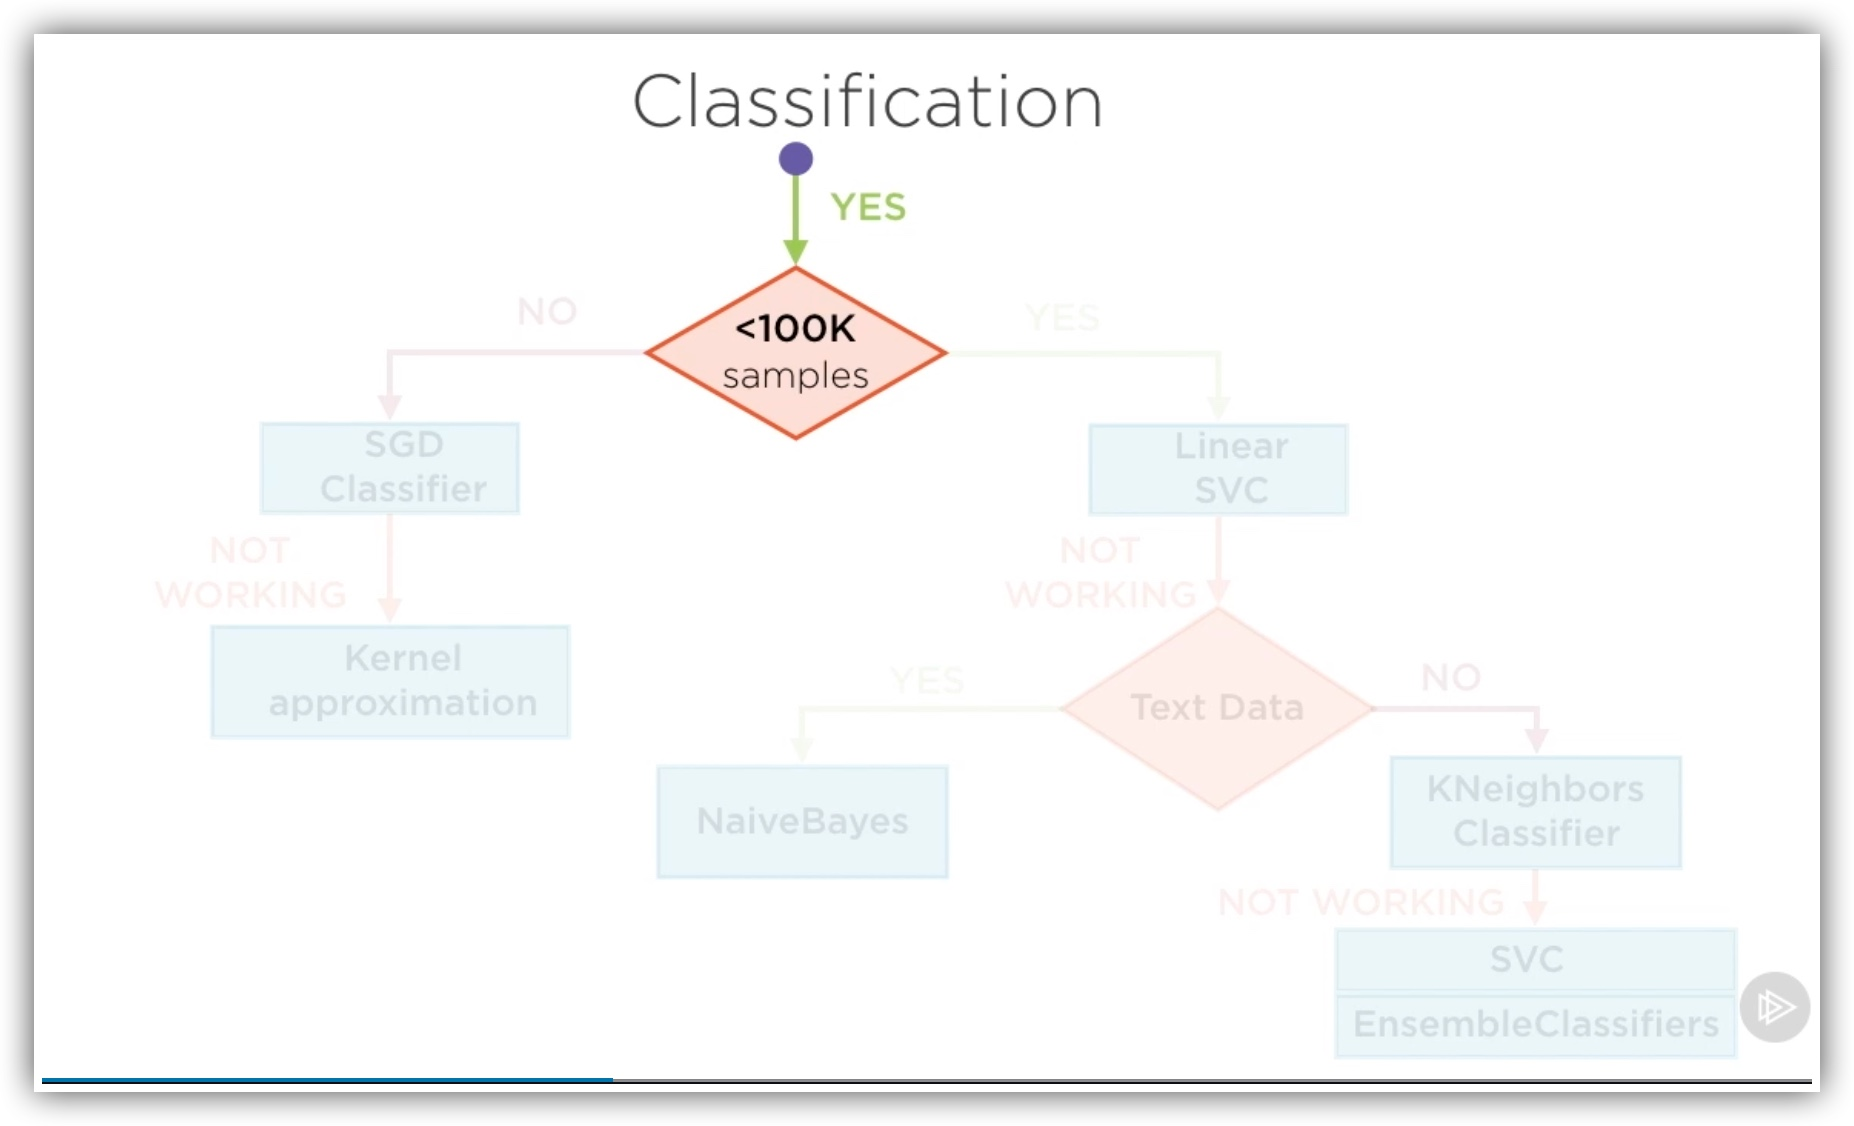

In [10]:
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/Classification/Janani Ravi/Building Classification Models with scikit-learn/Image/2021-12-25_17-56-54.jpg')

In [11]:
'''
 In binary classification, a linear discriminant is any line that can be used to separate the two classes into which we are categorizing data. 
 
 So when we use Linear Discriminant Analysis, we are trying to find those axes which best separate our classes such that all instances 
 of a class are in the same quadrant. 
 
 We define a classifier function here that takes in the training data and training labels and instantiates an estimator for Linear Discriminant Analysis from scikit-learn. 
 Our training data for ML models is numeric, and every record can be considered to be a point in an N-dimensional space. 
 
 So what are these best axes that linear discriminant analysis tries to find? 
 The best axes here refers to those axes that best separate the data into different classes. 
 
 There are different solvers that you can specify to perform Linear Discriminant Analysis, and these are used by this estimator object under the hood. 
 The SVD, or singular value decomposition solver, is what this estimator object uses by default. This solver finds the best axes to separate our data without 
 calculating the covariance matrix or features. 
 This is extremely useful when we have many features in our training data and many records as well. 
 
 With this function defined, it's now very easy for us to use the build_model function that we had set up earlier in order to build and train a classifier using Linear Discriminant Analysis. We saved the training and test scores for this particular model in the survived - linear-discriminant-analysis key of the result dictionary. The compare_results function will print out all of the model's training and testing scores, and we can use them to quickly compare across models. It seems that our model using Linear Discriminant Analysis did pretty well,

'''
def linear_discriminant_fn(x_train,y_train,solver='svd'):
    model=LinearDiscriminantAnalysis(solver=solver)
    model.fit(x_train,y_train)
    
    return model

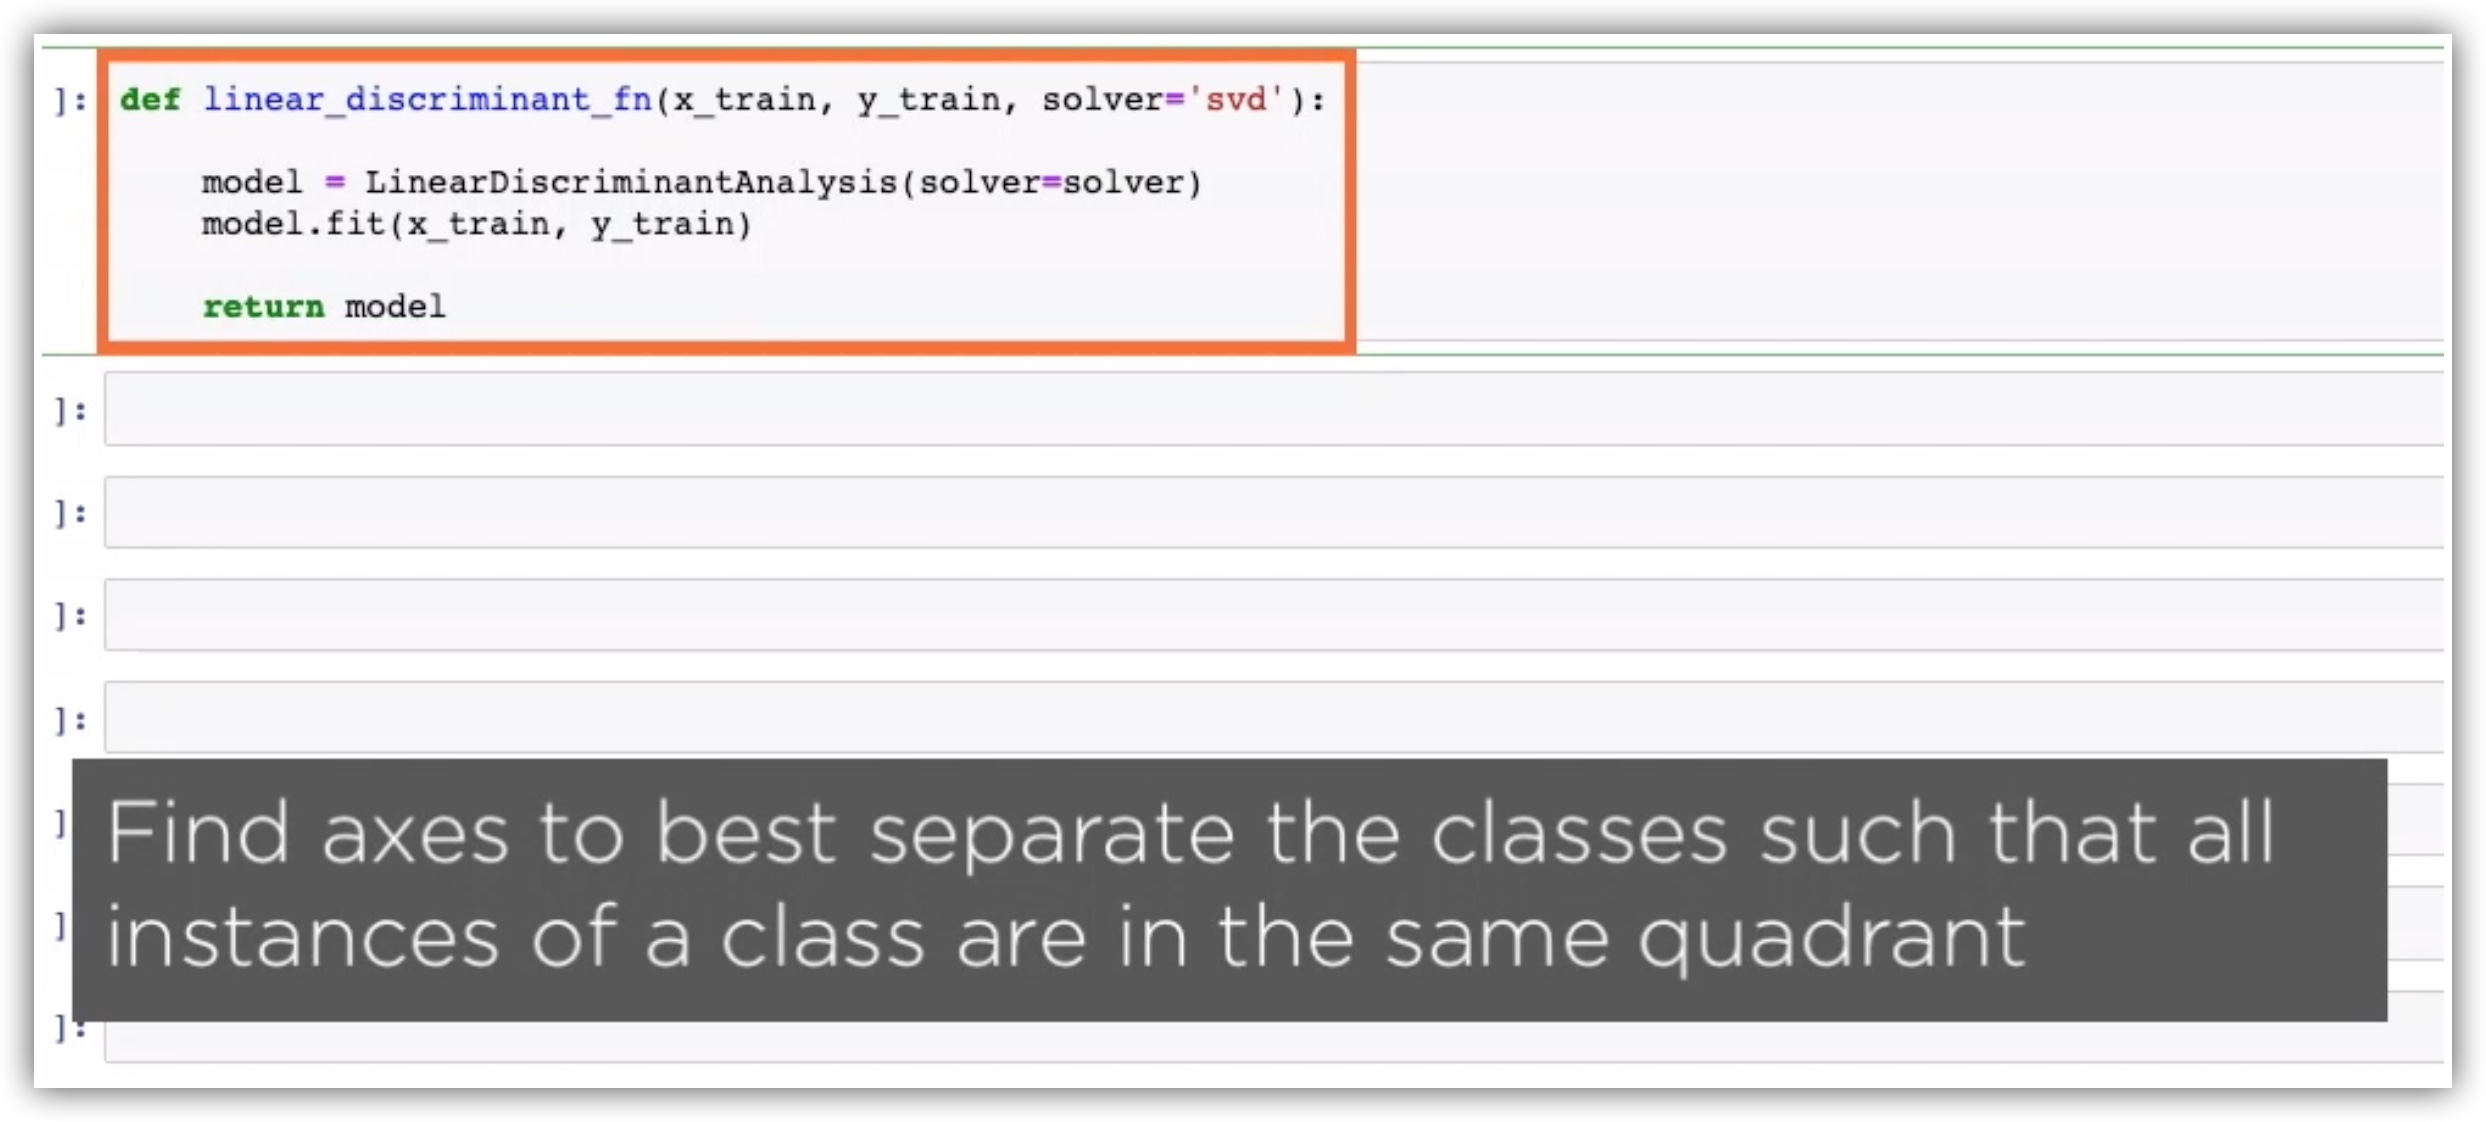

In [12]:
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/Classification/Janani Ravi/Building Classification Models with scikit-learn/Image/2022-01-20_17-30-41.jpg')

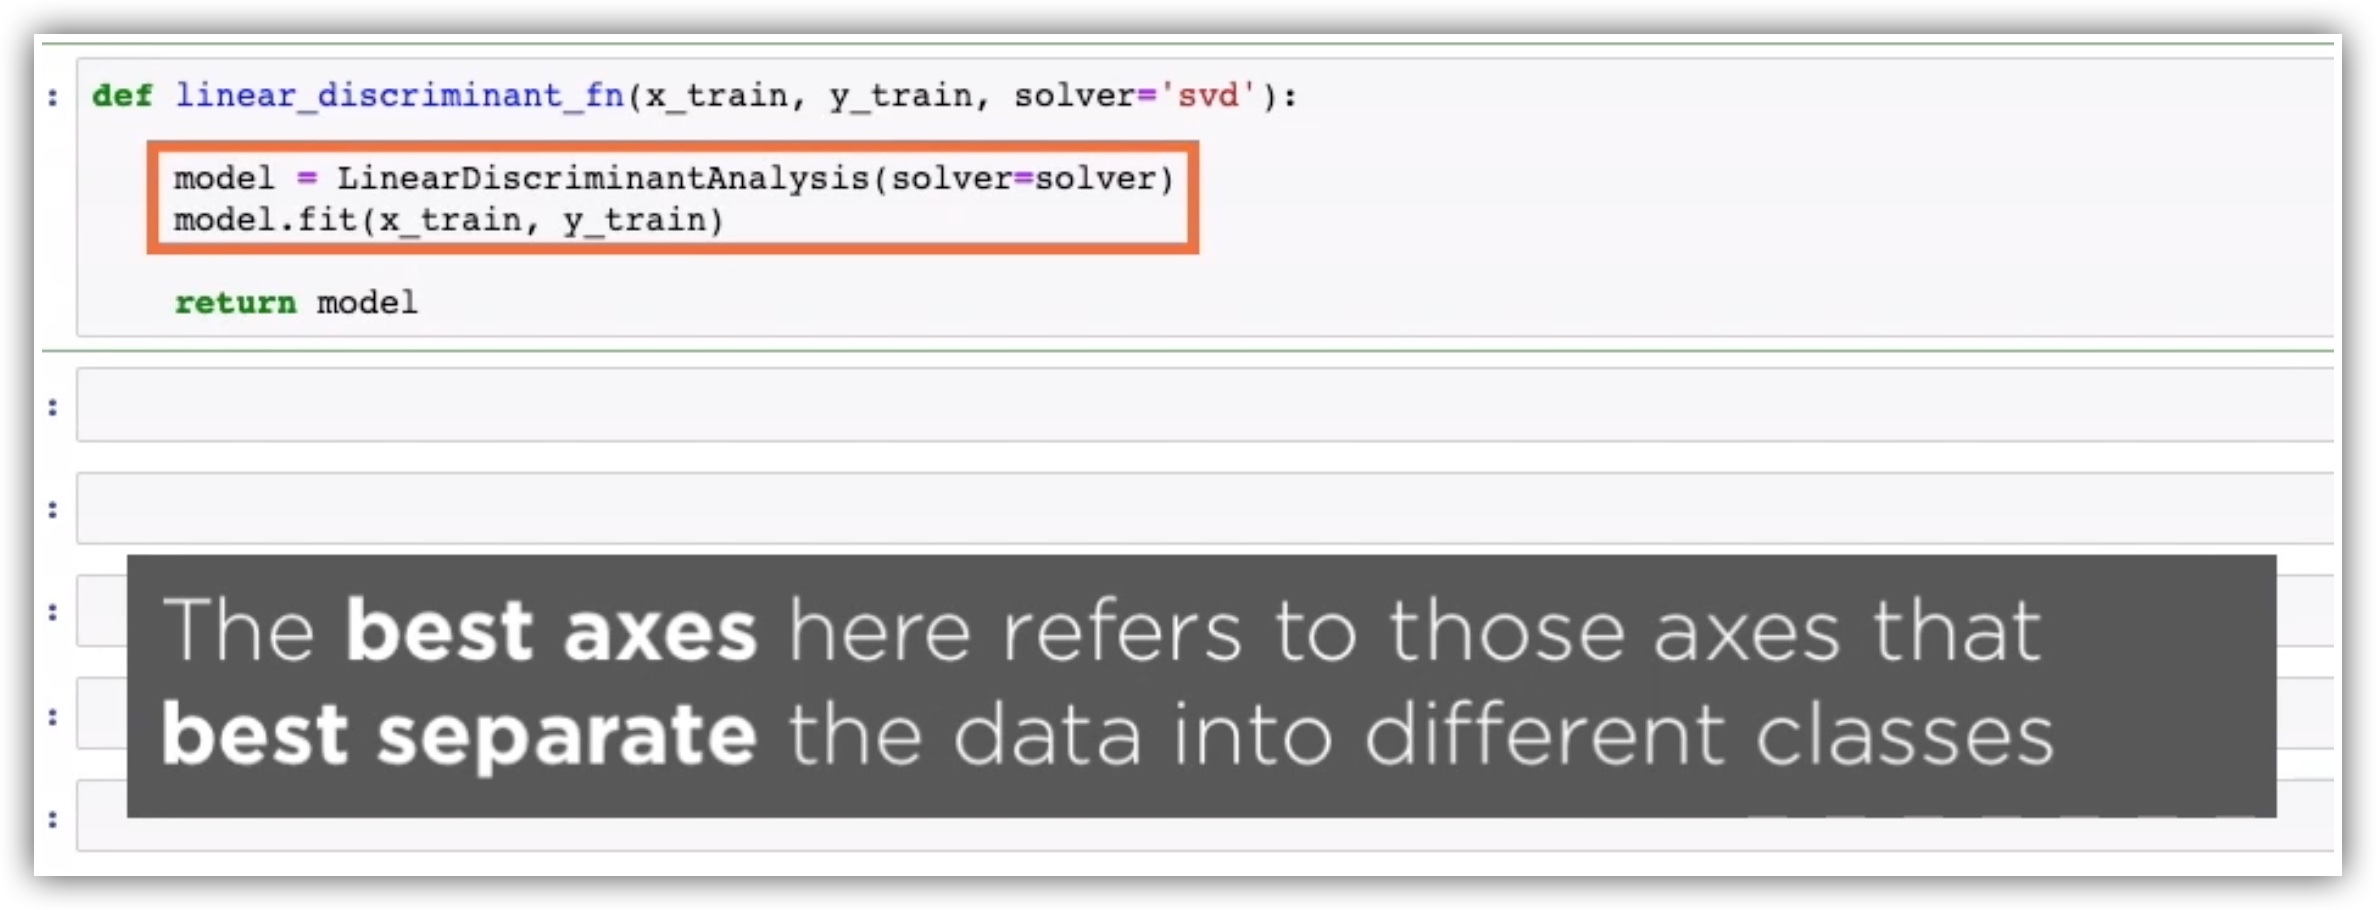

In [13]:
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/Classification/Janani Ravi/Building Classification Models with scikit-learn/Image/2022-01-20_17-34-22.jpg')

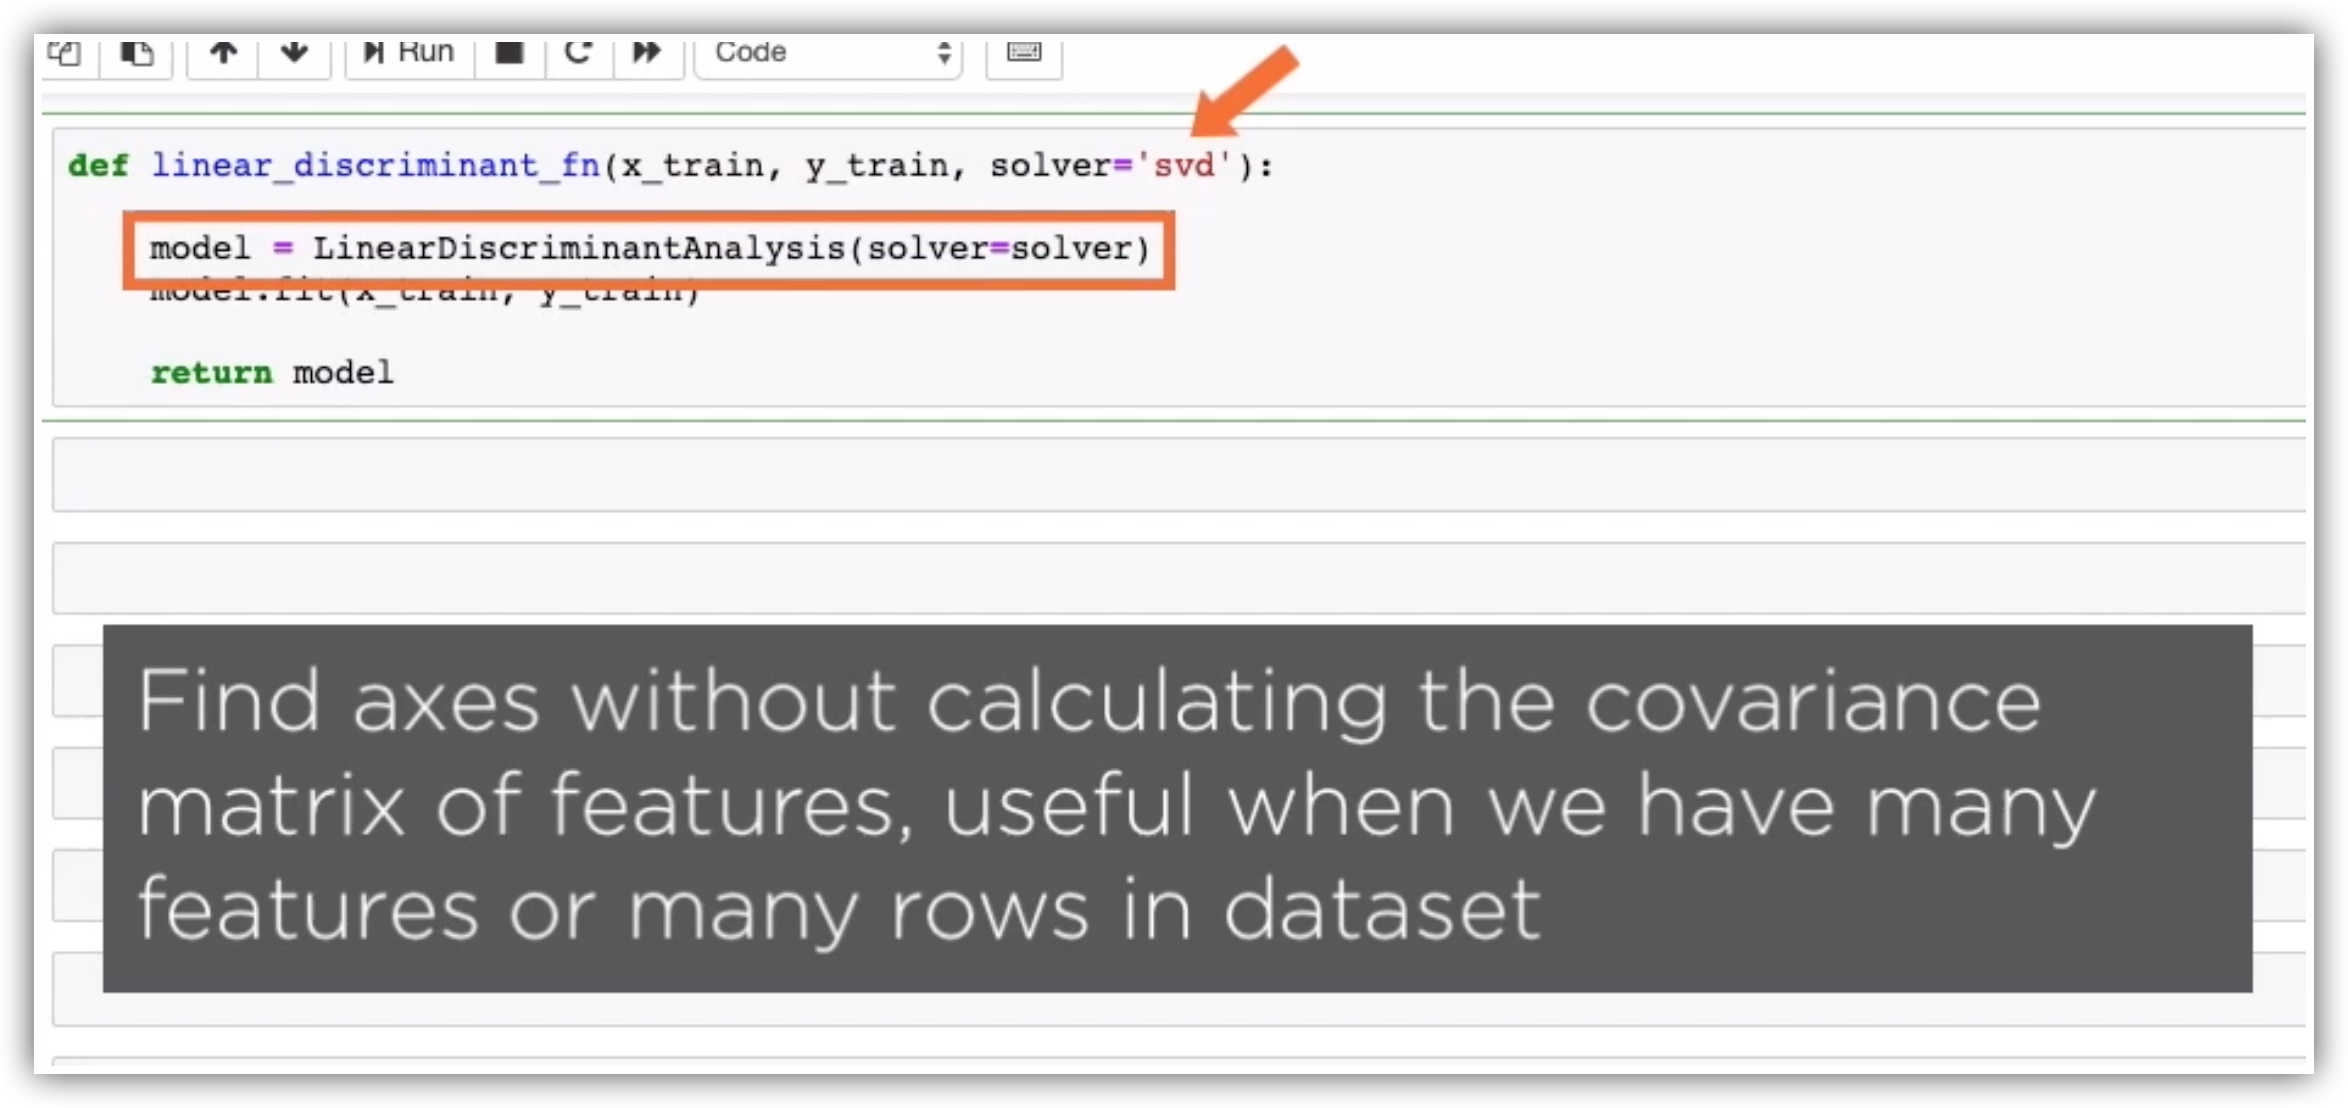

In [14]:
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/Classification/Janani Ravi/Building Classification Models with scikit-learn/Image/2022-01-20_17-35-06.jpg')

In [15]:
result_dict['survived ~ liner_discriminant_analysis']=build_model(linear_discriminant_fn,"Survived",FEATURES,titanic_df)
compare_results()

Classification:  survived ~ logistic

Training data
accuracy 0.8154657293497364
precision 0.8109452736318408
recall 0.7086956521739131
accuracy_count 464

Test data
accuracy 0.7622377622377622
precision 0.74
recall 0.6379310344827587
accuracy_count 109

Classification:  survived ~ liner_discriminant_analysis

Training data
accuracy 0.8031634446397188
precision 0.7783018867924528
recall 0.717391304347826
accuracy_count 457

Test data
accuracy 0.7692307692307693
precision 0.7358490566037735
recall 0.6724137931034483
accuracy_count 110

